In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from load_config import load_config
# config = load_config()
def fix_df(df):
    df['lambda1'] = df['lambda1'].apply(lambda x: -6.0 if x==0.0 else np.round(np.log10(x)))
    df['lambda2'] = df['lambda2'].apply(lambda x: -6.0 if x==0.0 else np.round(np.log10(x)))
    return df

def plot_func(modeltype,QP=''):
    fig,axs = plt.subplots(3,7,figsize=(40,12))
    for K in range(2,21):
        # print(K)
        try:
            df = pd.read_csv('../data/SPCA_results/SPCA'+QP+'_results_K='+str(K)+'_'+modeltype+'.csv')
        except:
            continue
        df = fix_df(df)
        sns.lineplot(x='lambda1',y='test_loss',hue='lambda2',data=df,ax=axs[(K-2)//7,(K-2)%7])
        minval = df['test_loss'].min()
        minloc = df['test_loss'].idxmin()
        minlambda1 = df['lambda1'][minloc]
        minlambda2 = df['lambda2'][minloc]
        axs[(K-2)//7,(K-2)%7].plot(minlambda1,minval,'ro')
        axs[(K-2)//7,(K-2)%7].set_title('K='+str(K))
        axs[(K-2)//7,(K-2)%7].set_ylim([np.min(df['test_loss'])-0.15,np.min(df['test_loss'])+2])
        axs[(K-2)//7,(K-2)%7].set_xlabel('$\lambda_1$')
        axs[(K-2)//7,(K-2)%7].set_ylabel('test_loss')

def diff_plot(modeltype):    
    fig,axs = plt.subplots(3,7,figsize=(40,12))
    for K in range(2,21):
        # print(K)
        try:
            df1 = pd.read_csv('../data/SPCA_results/SPCA_results_K='+str(K)+'_'+modeltype+'_group_PCA.csv')
            df1 = fix_df(df1)
            best1_loc = df1['test_loss'].idxmin()
            best1_lambda1 = df1['lambda1'][best1_loc]
            best1_lambda2 = df1['lambda2'][best1_loc]
            df1 = df1[df1['lambda1']==best1_lambda1]
            df1 = df1[df1['lambda2']==best1_lambda2]
            df1['which'] = 'torch'

            df2 = pd.read_csv('../data/SPCA_results/SPCA_QP_results_K='+str(K)+'_'+modeltype+'_group_PCA.csv')
            df2 = fix_df(df2)
            best2_loc = df2['test_loss'].idxmin()
            best2_lambda1 = df2['lambda1'][best2_loc]
            best2_lambda2 = df2['lambda2'][best2_loc]
            df2 = df2[df2['lambda1']==best2_lambda1]
            df2 = df2[df2['lambda2']==best2_lambda2]
            df2['which'] = 'cvxpy'

            df = pd.concat([df1,df2])
            sns.boxplot(x='which',y='test_loss',data=df,ax=axs[(K-2)//7,(K-2)%7])
            axs[(K-2)//7,(K-2)%7].set_title('K='+str(K))
            axs[(K-2)//7,(K-2)%7].set_ylabel('test_loss')

        except:
            continue

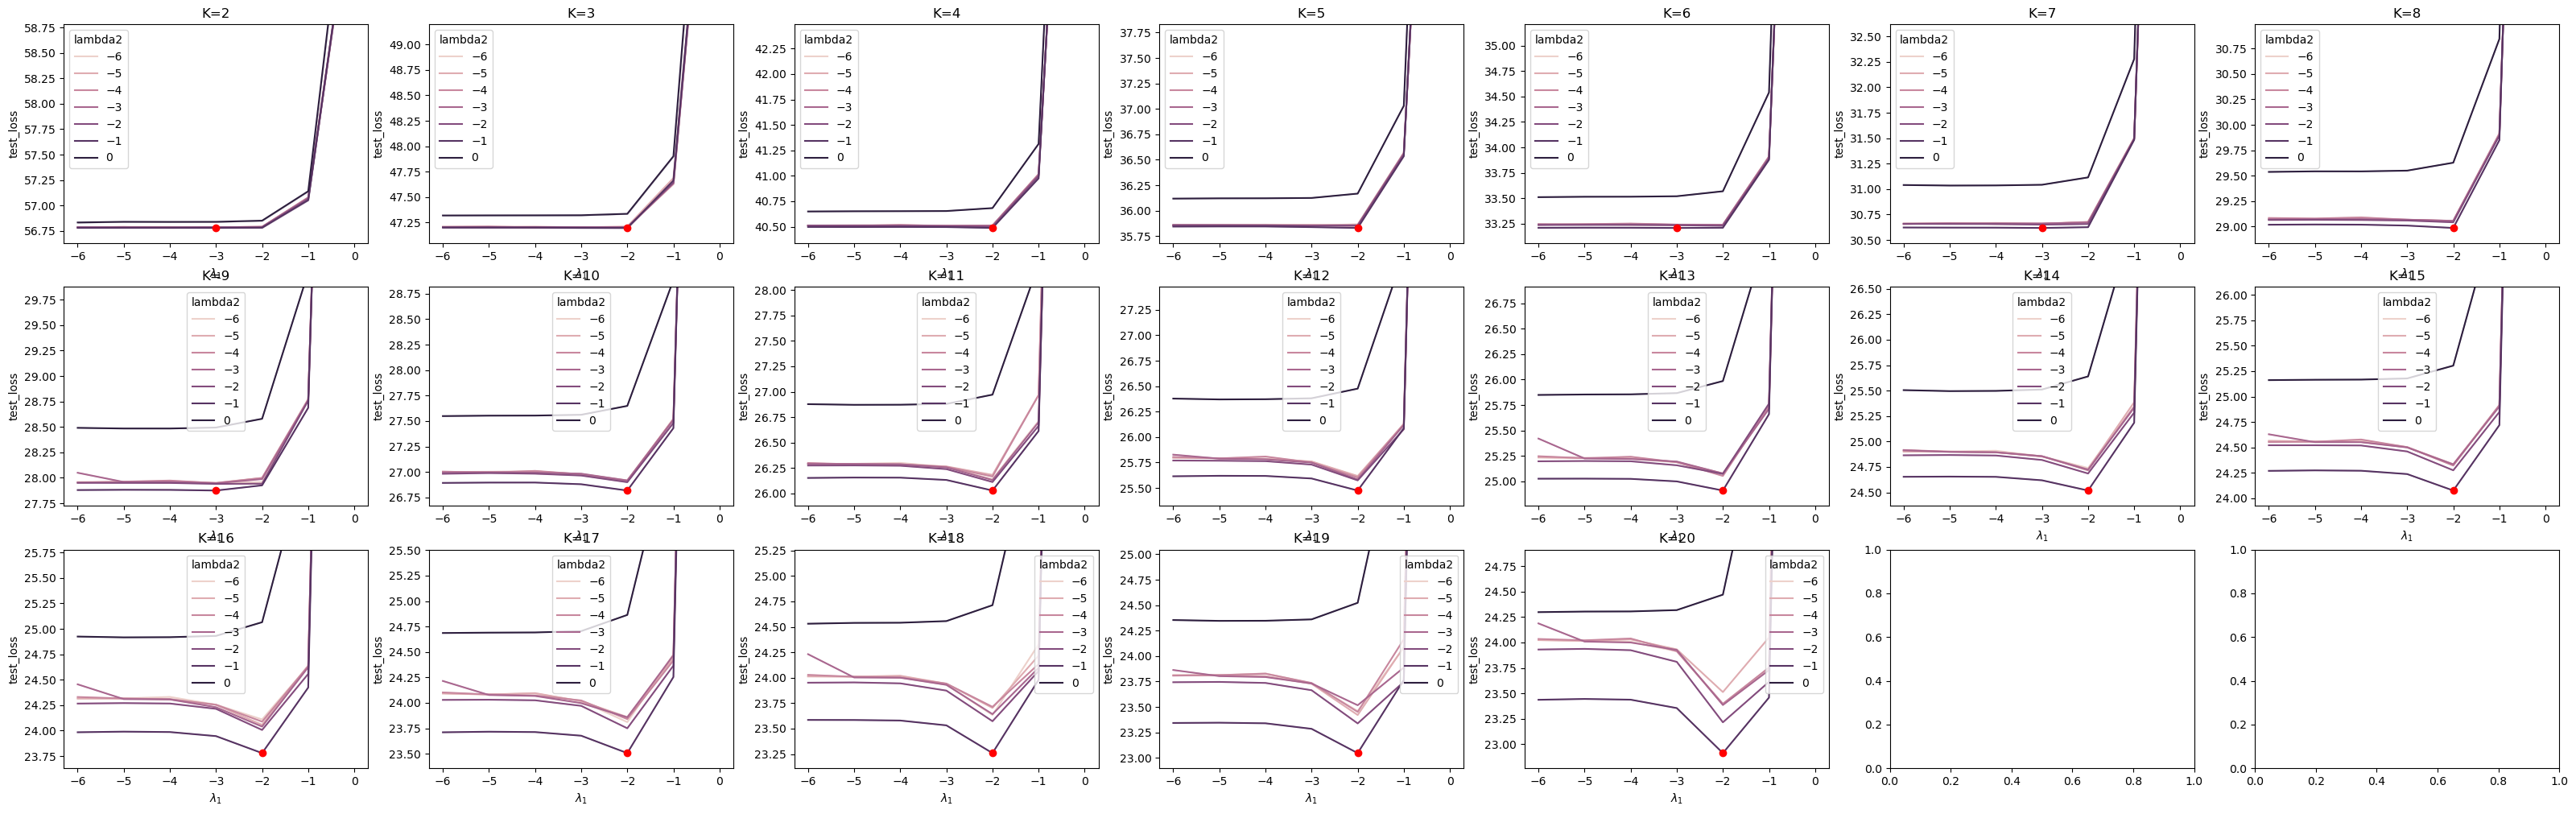

In [3]:
modeltype = 'group'
plot_func(modeltype)

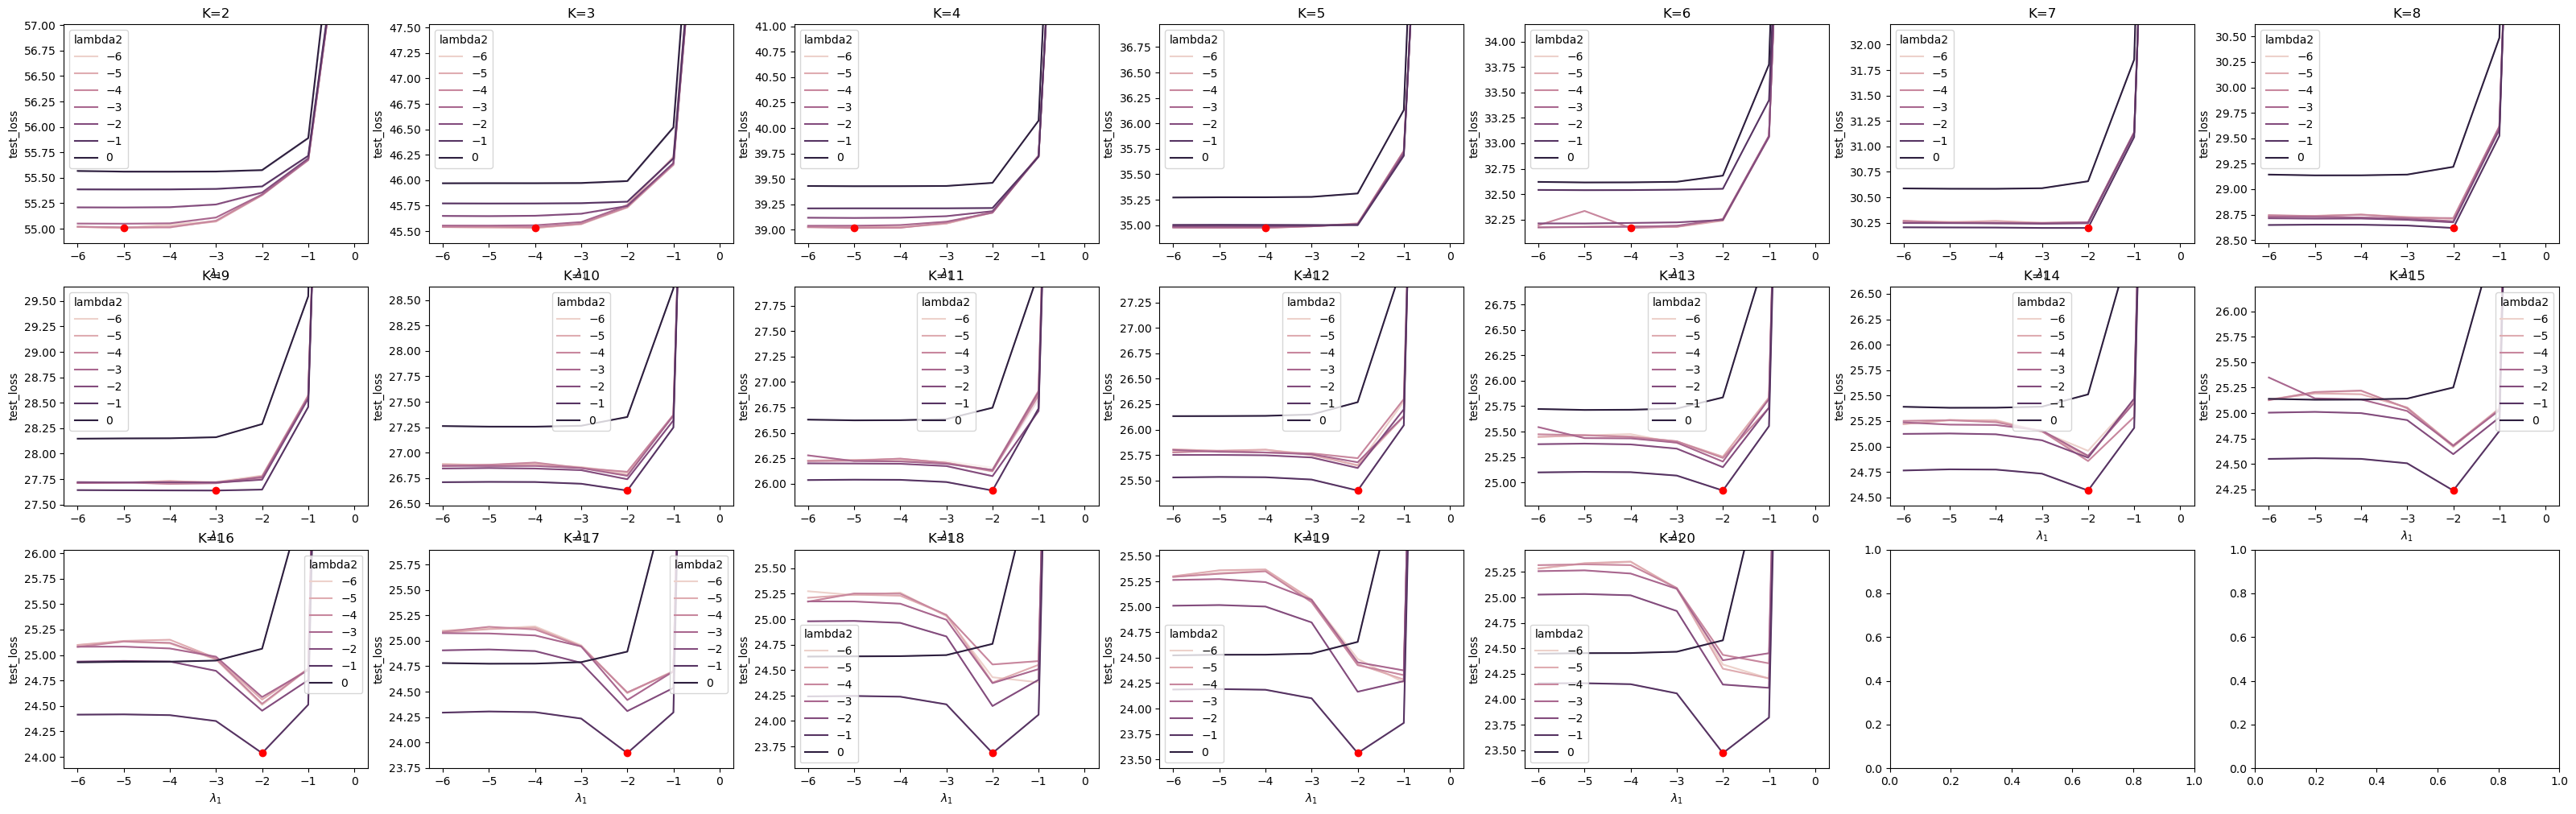

In [4]:
modeltype = 'mm'
plot_func(modeltype)

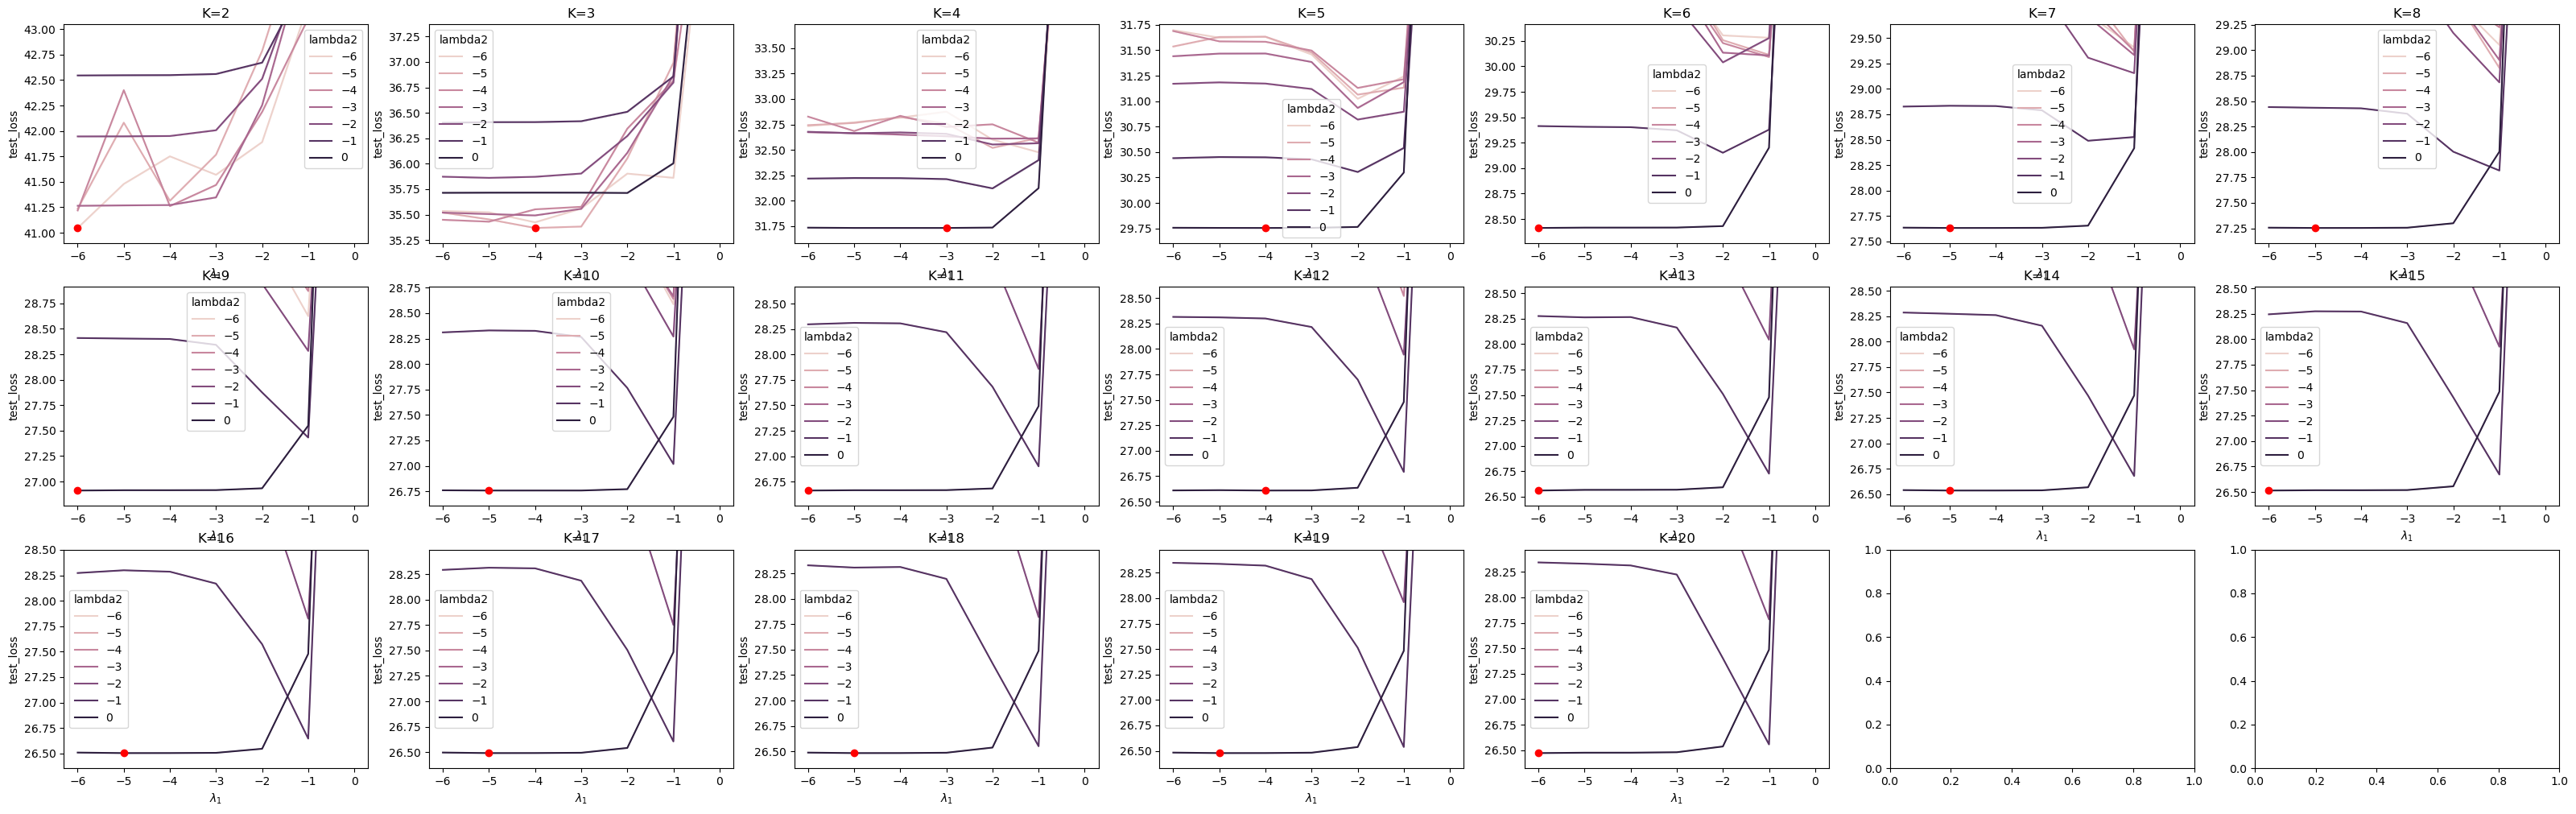

In [5]:
modeltype = 'mmms'
plot_func(modeltype)

In [6]:
df = pd.read_csv('../data/SPCA_results/SPCA_results_K=19_mmms.csv')
df = fix_df(df)
df = df[df['lambda2']==0]
df = df[df['lambda1']==-3]
data = df['test_loss'].values
np.mean(data),np.std(data)

(26.48149877858957, 0.0)

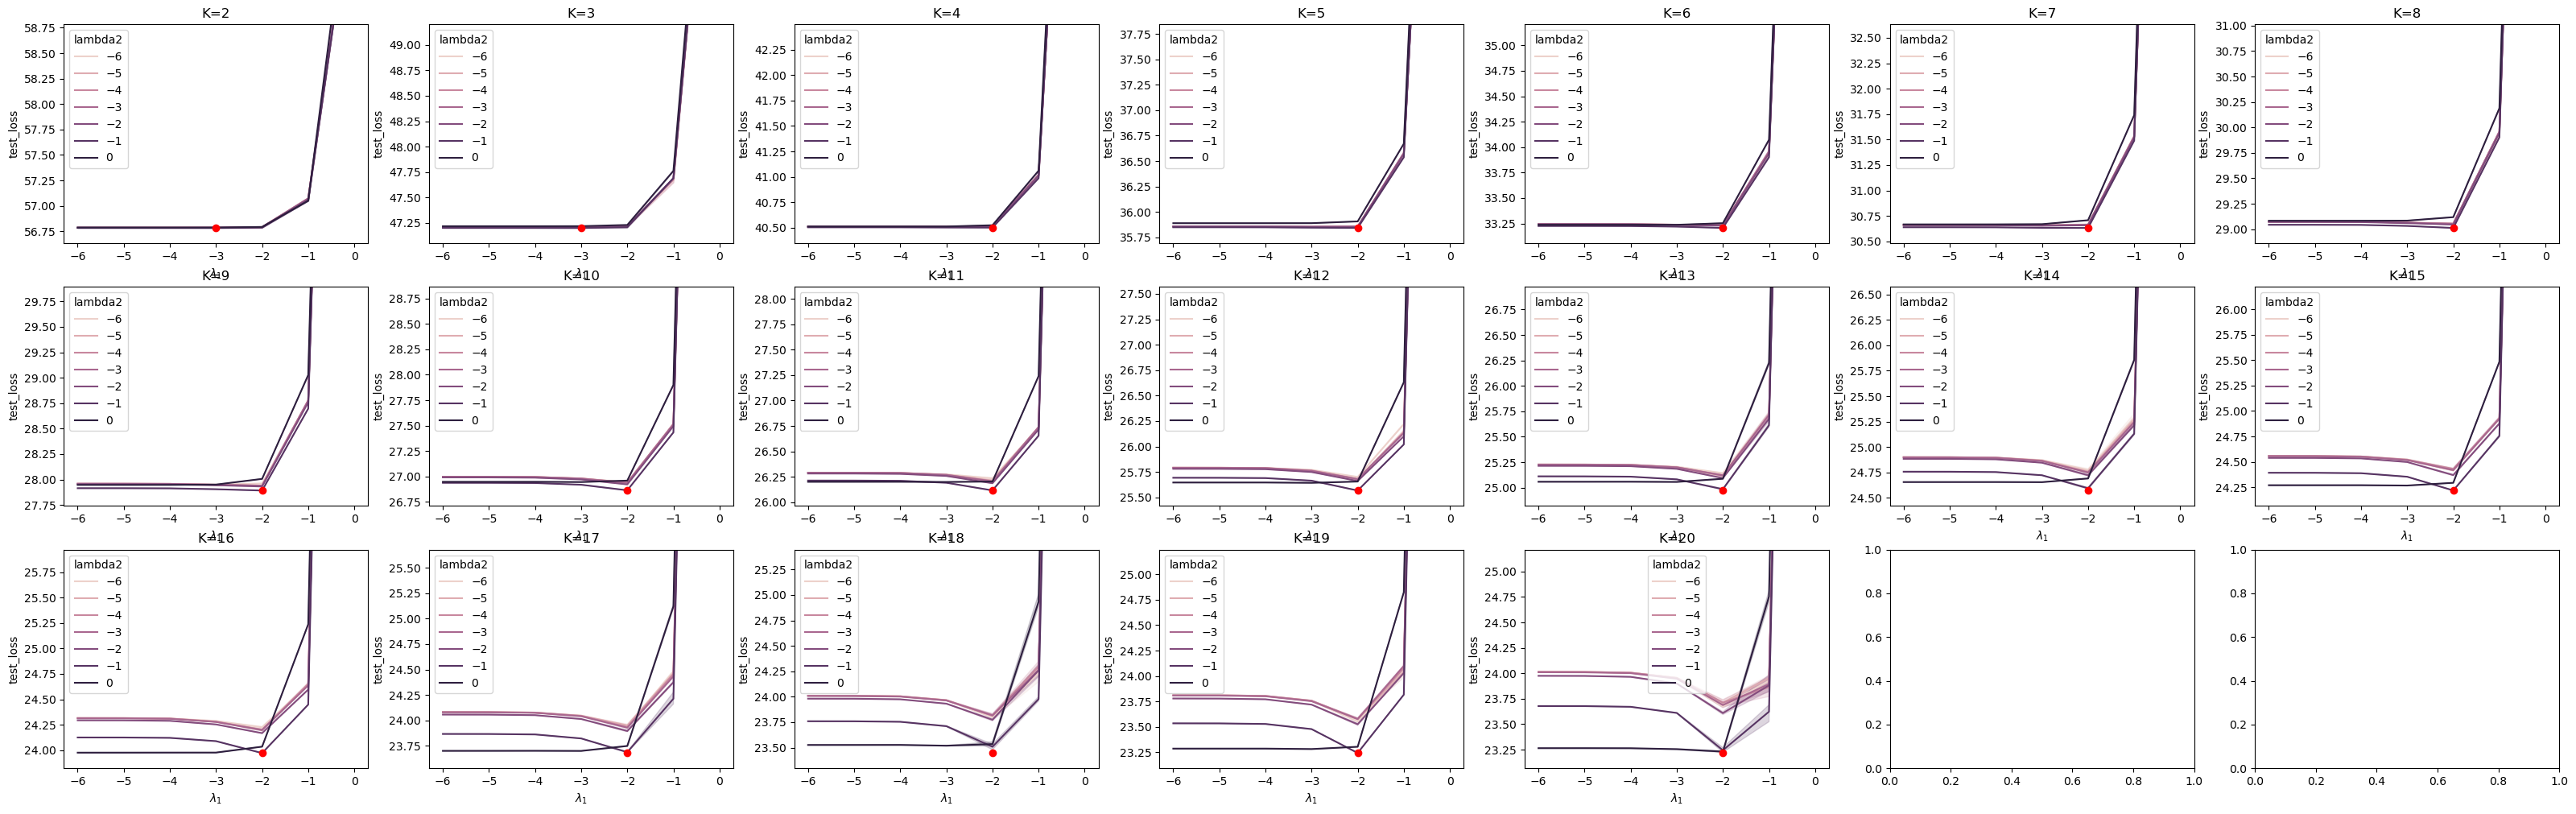

In [7]:
modeltype = 'group'
plot_func(modeltype,QP='_QP')

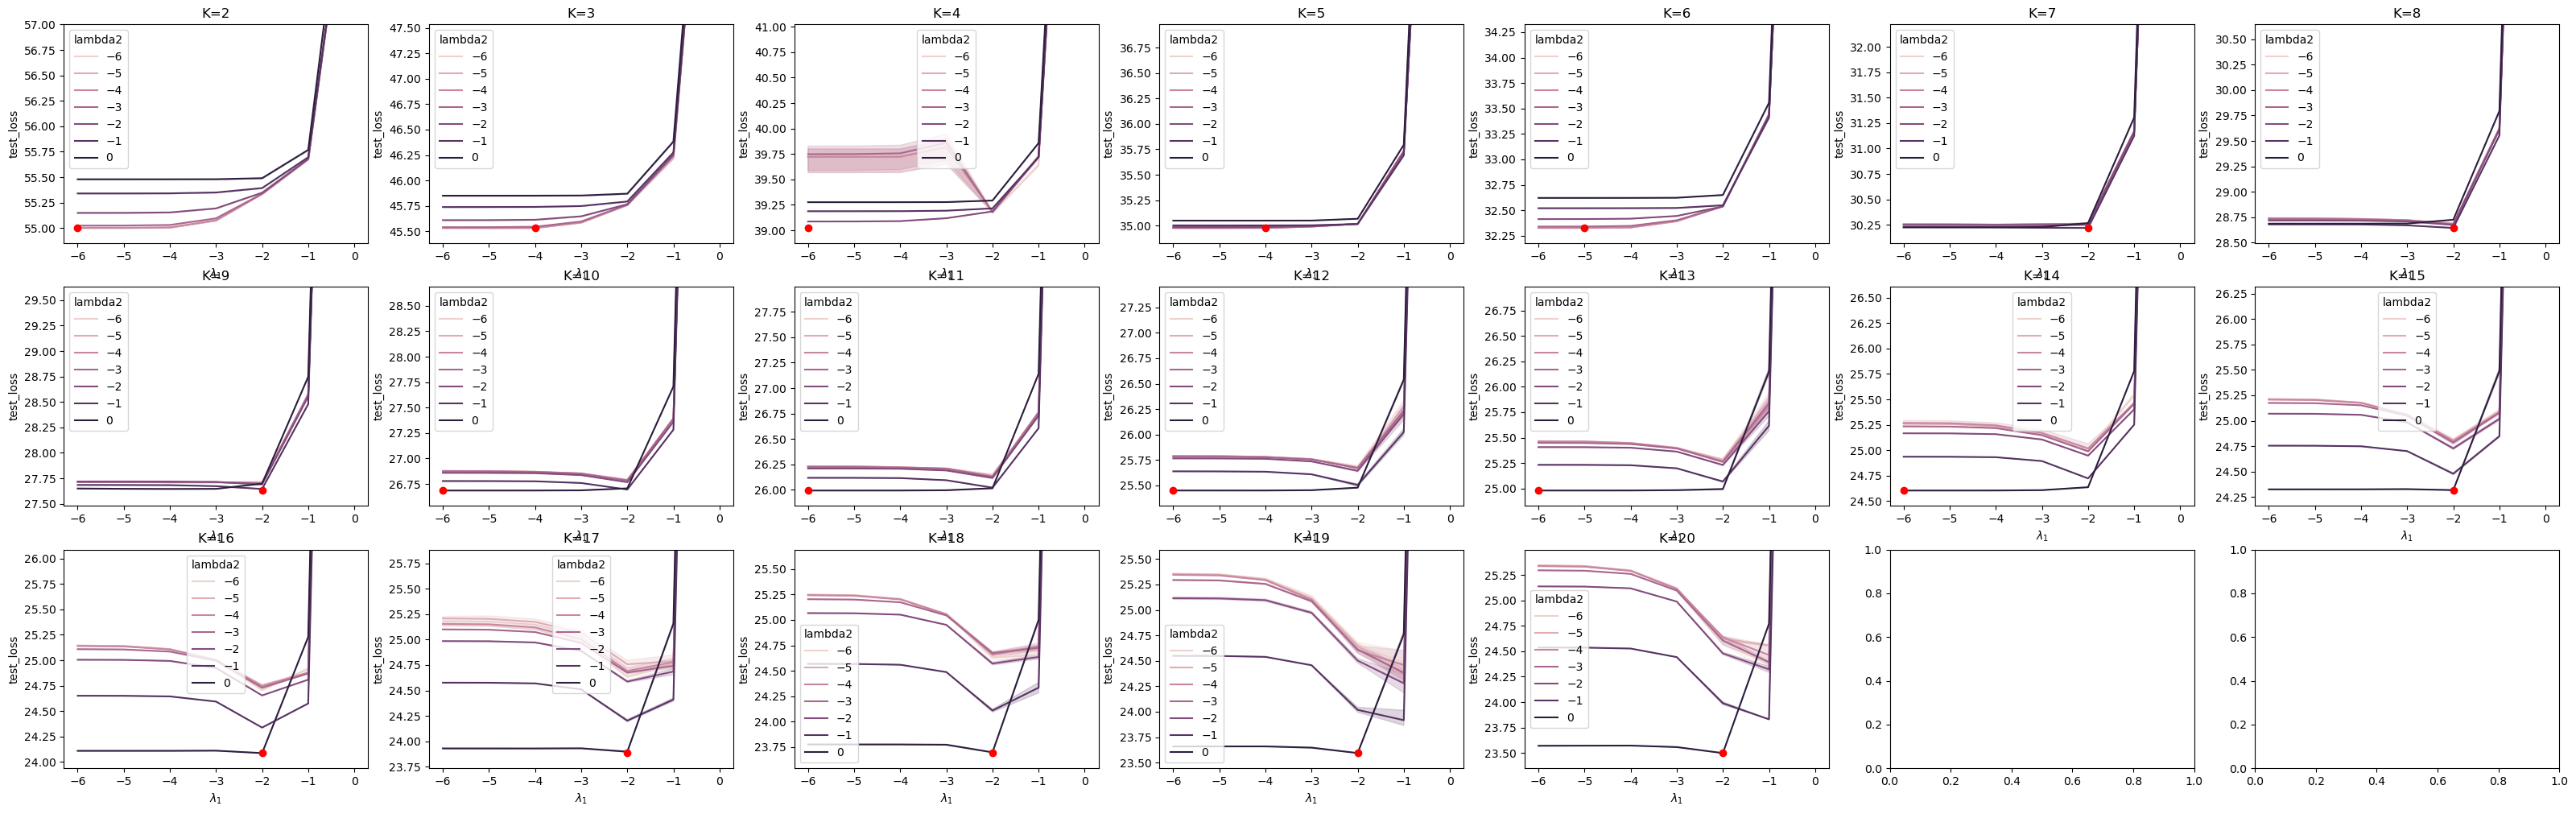

In [8]:
modeltype = 'mm'
plot_func(modeltype,QP='_QP')

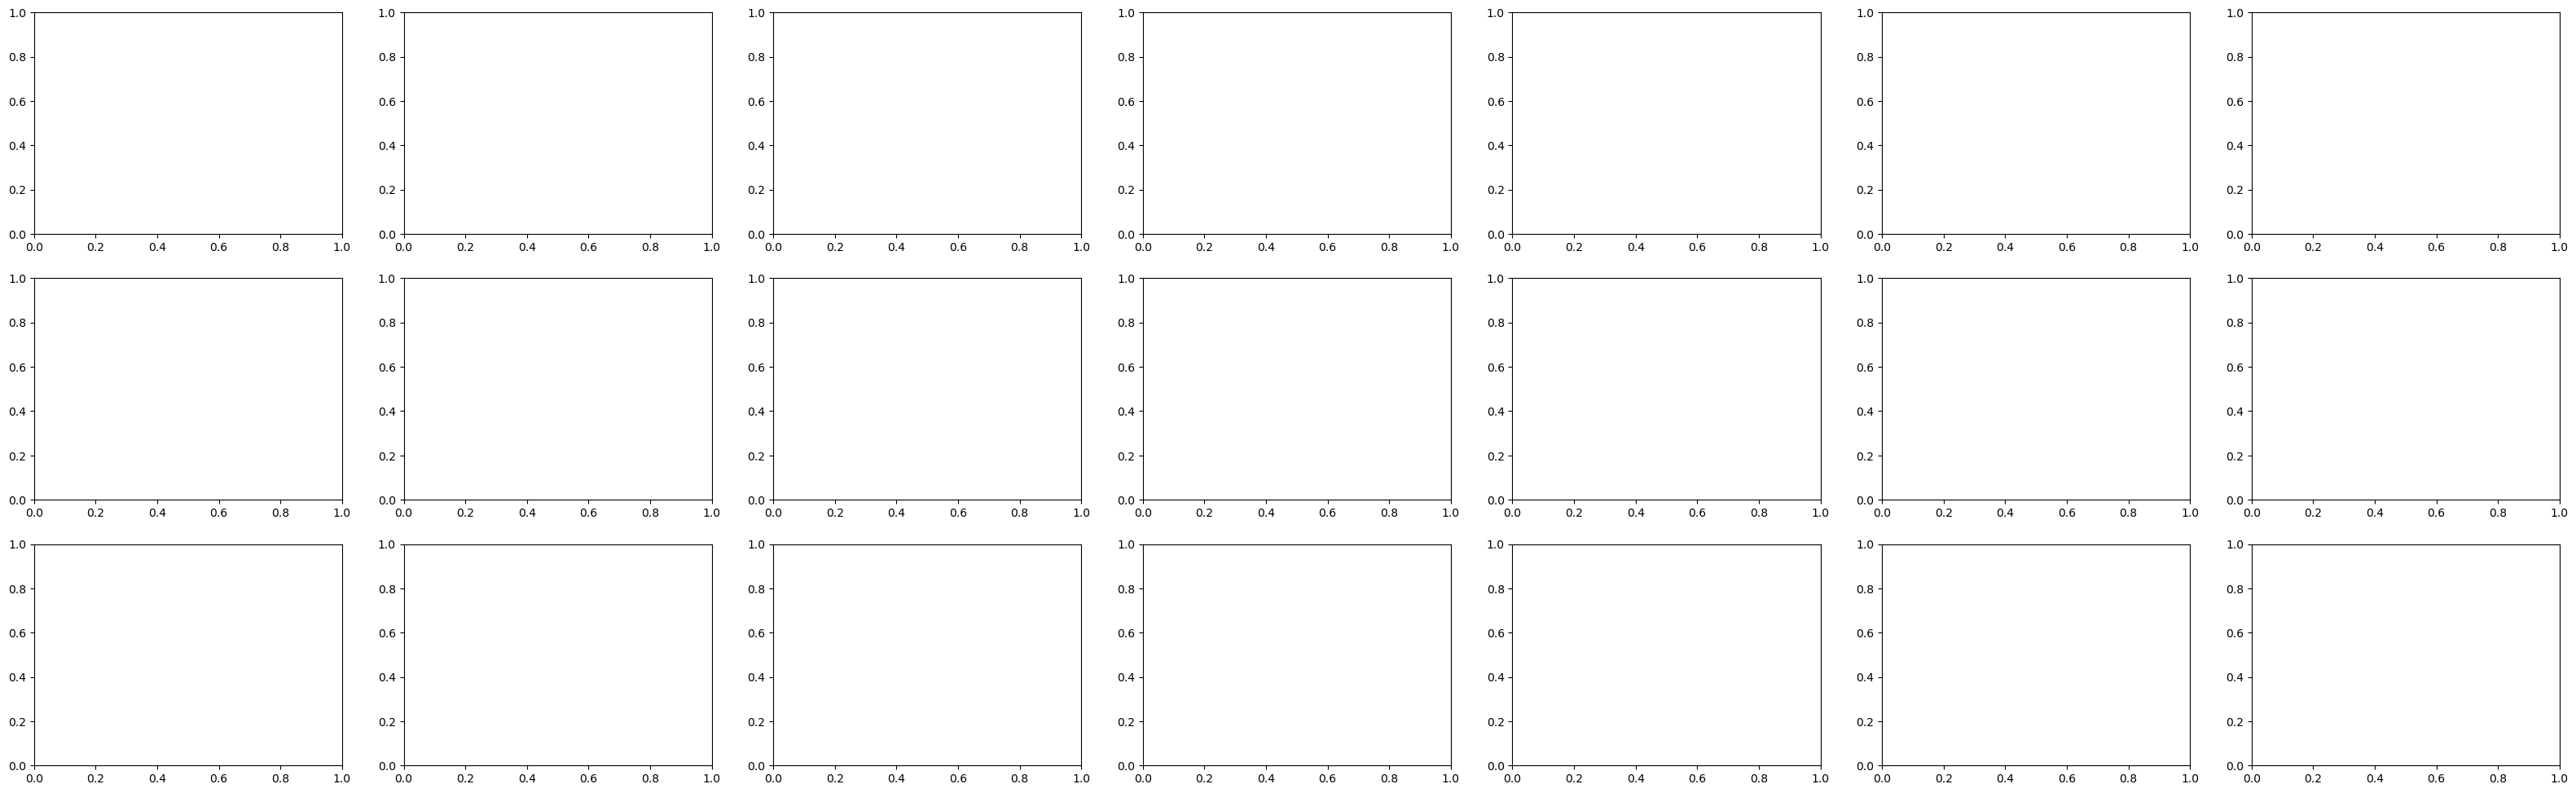

In [4]:
modeltype = 'mmms'
plot_func(modeltype,QP='_QP')

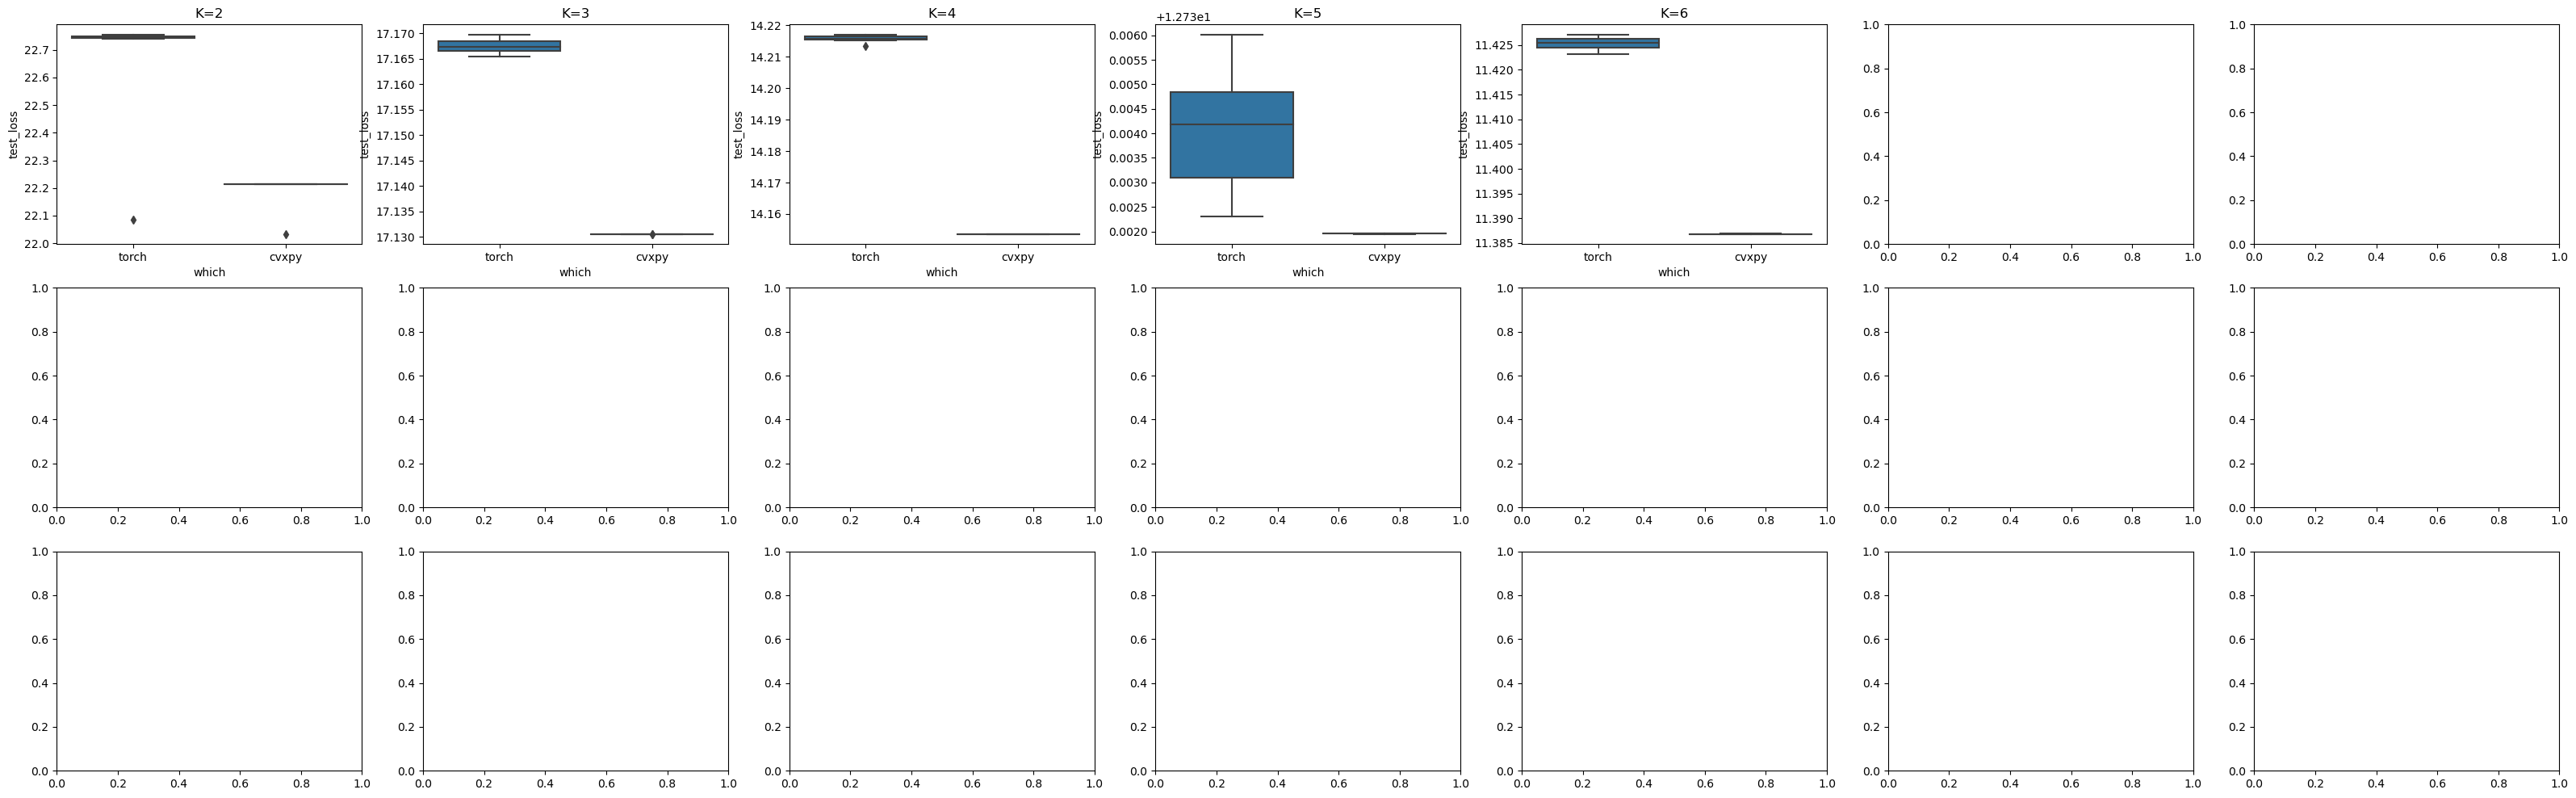

In [5]:
modeltype = 'mm'
diff_plot(modeltype)